In [1]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [2]:
# target function
a = 1.
b = 2.
f = lambda x: a*x+b

#test
f(2.)

4.0

In [3]:
#model
#nn.Linear
in_dim = 1
out_dim = 1

model = nn.Sequential(
    nn.Linear(in_dim, 2),
    nn.ReLU(),
    nn.Linear(2, out_dim)
)

In [4]:
#loss function 
criterion = nn.MSELoss()

In [5]:
#optimizer
learning_rate = 0.001
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate) 

In [6]:
#training data

batch_size = 5

x_train = torch.linspace(0, batch_size-1, batch_size).reshape(batch_size, 1)
y_train = a * x_train + b


In [7]:
# Train the model

num_epochs = 10000

for epoch in range(num_epochs):

    # Forward pass
    outputs = model(x_train)
    loss = criterion(outputs, y_train)
    
    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (epoch+1) % 500 == 0:
        print ('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, 
                                                    num_epochs, loss.item()))


Epoch [500/10000], Loss: 0.1933
Epoch [1000/10000], Loss: 0.0877
Epoch [1500/10000], Loss: 0.0333
Epoch [2000/10000], Loss: 0.0110
Epoch [2500/10000], Loss: 0.0041
Epoch [3000/10000], Loss: 0.0019
Epoch [3500/10000], Loss: 0.0011
Epoch [4000/10000], Loss: 0.0008
Epoch [4500/10000], Loss: 0.0007
Epoch [5000/10000], Loss: 0.0007
Epoch [5500/10000], Loss: 0.0007
Epoch [6000/10000], Loss: 0.0006
Epoch [6500/10000], Loss: 0.0006
Epoch [7000/10000], Loss: 0.0006
Epoch [7500/10000], Loss: 0.0006
Epoch [8000/10000], Loss: 0.0006
Epoch [8500/10000], Loss: 0.0006
Epoch [9000/10000], Loss: 0.0005
Epoch [9500/10000], Loss: 0.0005
Epoch [10000/10000], Loss: 0.0005


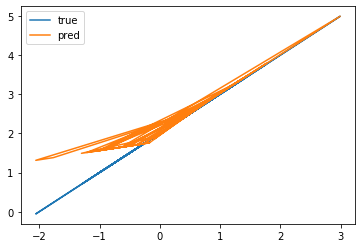

In [8]:
#test
x_ = torch.randn(50,1)
y_ = f(x_)
plt.plot(x_.detach().numpy(), y_.detach().numpy(), label='true')

y_pred = model(x_)
plt.plot(x_.detach().numpy(), y_pred.detach().numpy(), label='pred')

plt.legend()

__Todo__

- Improve the above code.
- train a model to $f(x) = x^2 + 1$
- train a model to 
$$f(x) = \begin{bmatrix} 
1 & 1 \\
0 & 1 
\end{bmatrix} x + 
\begin{bmatrix} 
1  \\
0  
\end{bmatrix}$$